<a href="https://colab.research.google.com/github/KevinAlanTC/Customer-Segmentation-KMeans/blob/main/Segmentation_using_NonSupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El proyecto es desarrollado conjuntamente por [Kevin Alan Torres Cruz](https://github.com/KevinAlanTC)
estudiante de la ENP N.6 UNAM, bajo la asesoría de [Ingrid Midory Monterroso Alfaro](https://github.com/ingridmidory), responsable del *laboratorio Data Minds: Laboratorio de Inteligencia Artificial.* Con la finalidad de llevar a cabo las prácticas profesionales como parte de la conclusión del estudio técnico especializado en computación en la Escuela Nacional Preparatoria de la UNAM.

El objetivo de este proyecto es implementar un algoritmo de Machine Learning (Clustering K-Means) para segmentación del cliente.
La base de datos utilzada se encuentra disponible para uso publico en [Kaggle](https://www.kaggle.com/) bajo el titulo [“Customer Segmentation : Clustering"](https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering)

#Bibliotecas

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Lectura del archivo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_def = pd.read_csv("/content/drive/MyDrive/Prácticas Escolares/Data Bases/new (1).csv") #cargar los datos
df_def #muestra el documento
df_def.info() #dar la información
df_def

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Lista de Variables

- 🆔 ID

- 🎂 Año de nacimiento (Year_Birth)

- 🎓 Nivel educativo (Education)

- 💍 Estado civil (Marital_Status)

- 💰 Ingreso anual (Income)

- 🏠 Niños y adolescentes en casa (Kidhome / Teenhome)

- 📅 Fecha de ingreso (Dt_Customer)

- 🔁 Número de días desde la última compra o interacción del cliente con la empresa hasta el momento en que se recogieron los datos. (Recency)

- 🍷🍖🧁 Gastos en diferentes categorías de productos (MntWines, MntMeatProducts, etc.)

- 💸 Número de compras en oferta (NumDealsPurchases)

- 🌐🛒 Número de compras por internet (NumWebPurchases)

- 👀 Número de compras por catálogo (NumCatalogPurchases)

-	🛍️ Número de compras en tienda (NumStorePurchases)

- 🌐 Visitas al sitio web (NumWebVisitsMonth)

- ☑️ Aceptación de Campañas (AcceptedCmp1 - AcceptedCmp5)

- 😡 Quejas (Complain)

- 📢 Costo por contactar al cliente (quizá por campaña o canal) (Z_Cost_Contact)

- 💰 Ingreso total generado por el cliente	(Z_TRevenue)

- 📉 Si respondió a la última campaña (1) o no (0)	(Reponse)

#Gráficos

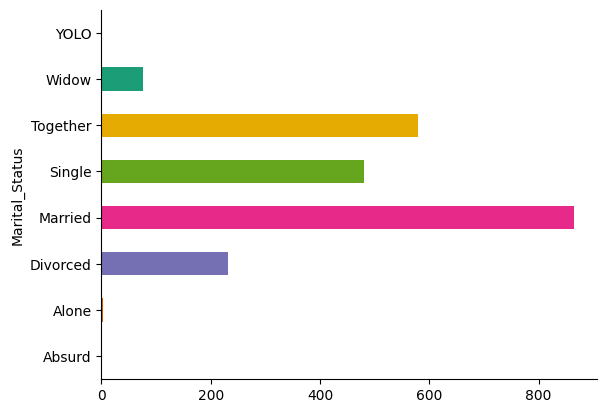

In [ ]:
# @title Estado civil
from matplotlib import pyplot as plt
import seaborn as sns
df_def.groupby('Marital_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Puede influir en las preferencias y el poder adqusitivo

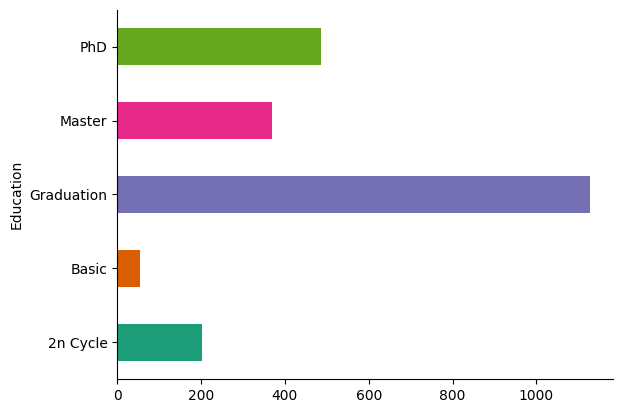

In [ ]:
# @title Nivel Educativo
from matplotlib import pyplot as plt
import seaborn as sns
df_def.groupby('Education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Puede influir en las preferencias y el poder adqusitivo

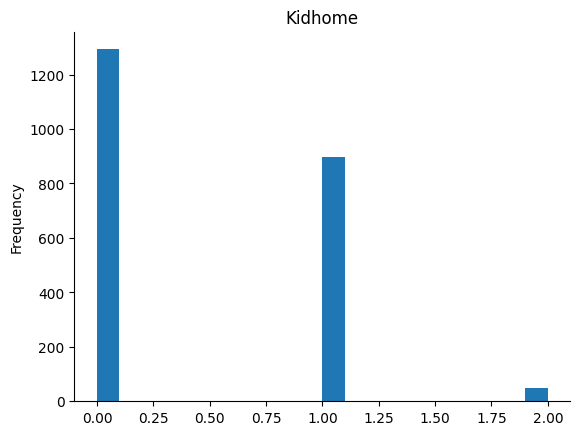

In [ ]:
# @title Niños en casa
from matplotlib import pyplot as plt
df_def['Kidhome'].plot(kind='hist', bins=20, title='Kidhome')
plt.gca().spines[['top', 'right',]].set_visible(False)


Podría revelar estilos de vida que afecten los patrones de compra (ej. clientes con hijos compran diferente).


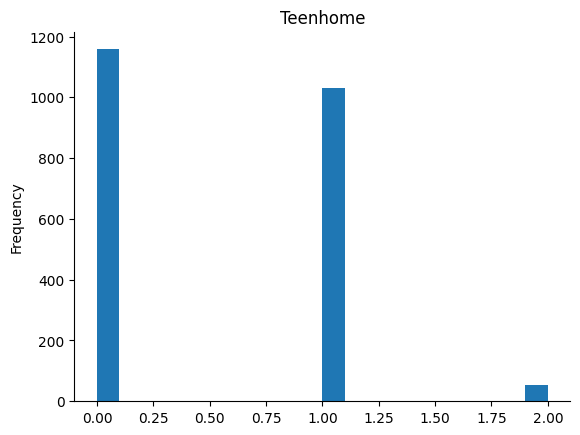

In [ ]:
# @title Jovenes en casa
from matplotlib import pyplot as plt
df_def['Teenhome'].plot(kind='hist', bins=20, title='Teenhome')
plt.gca().spines[['top', 'right',]].set_visible(False)

Podría revelar estilos de vida que afecten los patrones de compra (ej. clientes con hijos compran diferente).

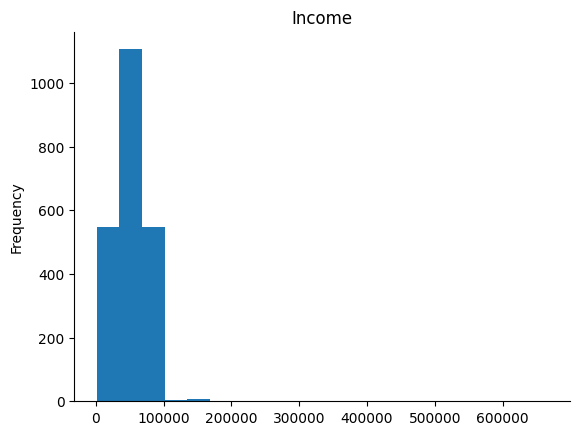

In [ ]:
# @title Ingreso
from matplotlib import pyplot as plt
df_def['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

Podría ayudar a detectar rangos de ingreso

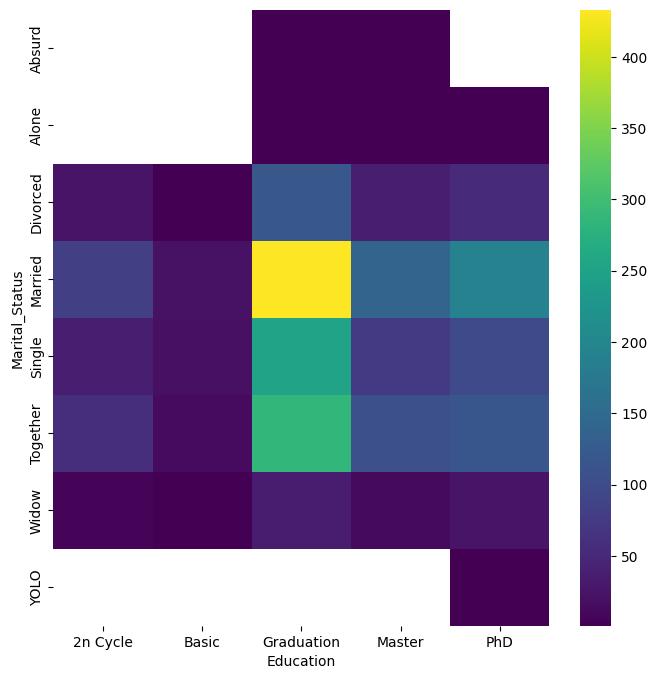

In [ ]:
# @title Nivel educativo VS Estado civil
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Marital_Status'].value_counts()
    for x_label, grp in df_def.groupby('Education')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Education')
_ = plt.ylabel('Marital_Status')

# Estadísticas Descriptivas

In [ ]:
#Estadísticas Descriptivas
print ("Estadisticas descriptivas")
print (df_def.describe(include='all'))

Estadisticas descriptivas
                  ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     T

1. Datos demográficos

* Edad promedio: alrededor de 56 años (nacidos en promedio en 1969).
* Rango: desde 1893 (132 años en el momento del registro) hasta 1996 (29 años).
* Estado civil más común: casados (864 clientes).
* Nivel educativo más común: Graduation (licenciatura, 1127 clientes).
* Ingreso promedio anual: \$52,247, con una gran dispersión (mínimo: \$1,730; máximo: \$666,666).

2. Estructura familiar

* Niños pequeños en casa (Kidhome): promedio 0.44 (lo más común es tener 0 o 1 hijo).
* Adolescentes en casa (Teenhome): promedio 0.50 (también 0 o 1).

En general, los hogares tienen pocos hijos en casa.

3. Consumo

* Gasto promedio en vinos: 304 (producto más consumido).
* Otros productos: carnes, pescados, dulces y oro con valores menores en promedio.

El vino es el producto estrella en el consumo.

4. Comportamiento de compra

* Visitas web al mes: promedio 5.3 (máximo 20).
* Canales de compra: hay compras en web, en catálogo y en tienda física.
* Recency (última compra): promedio 49 días, con clientes recientes y otros que llevan hasta 99 días sin comprar.

5. Campañas de marketing: La aceptación de campañas es baja en general:
* AcceptedCmp1: 6.4%
* AcceptedCmp2: 1.3%
* AcceptedCmp3: 7.2%
* AcceptedCmp4: 7.4%
* AcceptedCmp5: 7.2%

Respuesta general (Response): solo 15% respondió positivamente.

# Segmentación de Clientes

---

Aprendizaje no Supervisado.

Clustering K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Seleccionar las variables numéricas relevantes para clustering

In [ ]:
features = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth' ]

In [ ]:
X = df_def[features].copy()

# Manejo de valores nulos (rellenar con mediana)

X = X.fillna(X.median())

#Escalado de datos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducción a 2D con PCA para visualizar

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Estimar el número óptimo de clusters.

1. Método del Codo (Elbow Method)

Calcula la inercia (suma de distancias de los puntos a su centroide) para diferentes números de clusters.

A medida que aumenta el número clusters, la inercia disminuye.




2. Coeficiente de Silhouette

Mide qué tan bien separados están los clusters y qué tan compactos son.

oma valores entre -1 y 1:
* Cerca de 1 → los grupos están bien definidos.
* Cerca de 0 → los grupos se solapan.
* Cerca de -1 → los puntos están en el cluster equivocado.

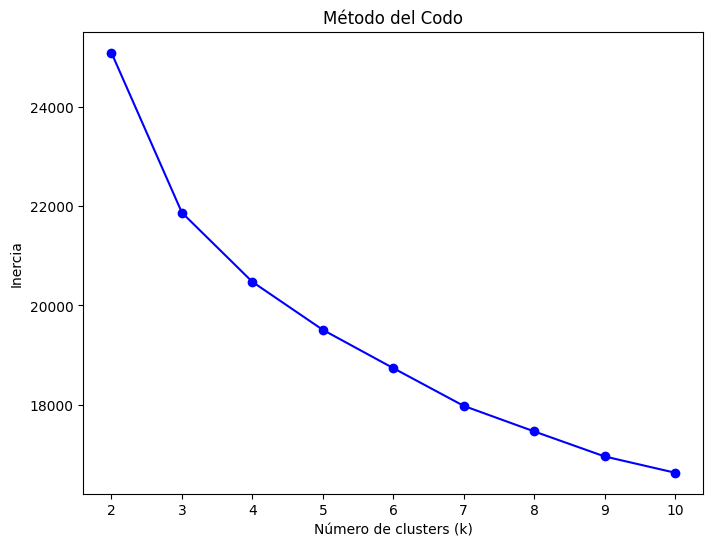

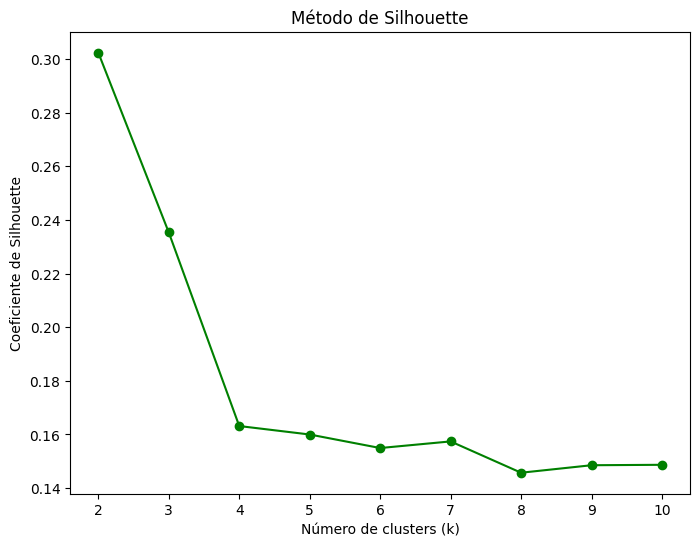

k=2: Silhouette=0.302
k=3: Silhouette=0.235
k=4: Silhouette=0.163
k=5: Silhouette=0.160
k=6: Silhouette=0.155
k=7: Silhouette=0.157
k=8: Silhouette=0.146
k=9: Silhouette=0.149
k=10: Silhouette=0.149


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Seleccionamos variables numéricas relevantes para clustering
features = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]

X = df_def[features].copy()

# Manejo de valores faltantes (rellenar con mediana)
X = X.fillna(X.median())

# Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ====== MÉTODO DEL CODO ======
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# ====== COEFICIENTE SILHOUETTE ======
silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,6))
plt.plot(K_range, silhouette_scores, 'go-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Método de Silhouette')
plt.show()

# Mostrar los valores de silhouette
for k, score in zip(K_range, silhouette_scores):
    print(f"k={k}: Silhouette={score:.3f}")


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Escalar los datos (si ya los tienes escalados, omite esta parte)
#scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)   # X = tu DataFrame con las variables numéricas

# Ajustar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# 1. Calcular Silhouette Score
silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score para 3 clusters: {silhouette:.3f}")

# 2. Crear DataFrame con los clusters asignados
df_clusters = X.copy()
df_clusters["Cluster"] = labels

# 3. Estadísticas descriptivas por cluster
cluster_summary = df_clusters.groupby("Cluster").mean()

print("\nMedia de las variables por cluster:")
print(cluster_summary)

# Si quieres ver el tamaño de cada cluster:
print("\nNúmero de elementos en cada cluster:")
print(df_clusters["Cluster"].value_counts())


Silhouette Score para 3 clusters: 0.235

Media de las variables por cluster:
          Year_Birth        Income   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                         
0        1968.385399  76493.236842  0.044143  0.168081  49.517827  585.835314   
1        1971.748538  34864.331871  0.806043  0.437622  49.384990   40.672515   
2        1964.371200  57900.390400  0.227200  0.937600  48.272000  470.446400   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
Cluster                                                                  
0        69.456706       452.456706        99.702886         71.458404   
1         4.936647        22.927875         6.906433          4.936647   
2        20.707200       134.315200        29.193600         21.547200   

         MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster                                                     
0           76.935484   

# Interpretación

1. Separación de clusters

Silhouette = 0.235 → Es bajo.
Significa que los clusters se solapan bastante, aunque todavía hay diferencias.

2. Perfiles de clusters

 🔵 Cluster 0 (589 clientes)

* Ingreso alto (~76,000).
* Gastan mucho en vinos y carnes (≈586 en vino, ≈452 en carne).
* Compran bastante en web y catálogo.
* Bajas visitas a la tienda física.

👉 Perfil: Clientes de alto ingreso, gourmet, compran online.

🟢 Cluster 1 (1,026 clientes, el más grande)

* Ingreso bajo (~34,800).
* Gastos muy bajos en todos los productos (vino ≈40, carne ≈23).
* Más hijos en casa (Kidhome ≈0.8, Teenhome ≈0.4).
* Visitan más la web (≈6.5 veces al mes), pero compran poco.

👉 Perfil: Familias con bajo ingreso, curiosos en la web pero con bajo consumo.

🔴 Cluster 2 (625 clientes)

* Ingreso medio (~57,900).
* Gastos intermedios en vinos y carnes (≈470 y 134).
* Compran en tienda física y web (7.6 en tienda, 6.3 en web).
* Tienen más adolescentes en casa (≈0.9).

👉 Perfil: Familias de ingresos medios, consumo mixto (tienda y online).

3. Tamaño de clusters

* Cluster 1: 1,026 clientes (47%) → segmento mayoritario.

* Cluster 2: 625 clientes (29%).

* Cluster 0: 589 clientes (27%).

🚩 *Con esto ya podemos hacer un perfil de clientes:*

1. Familias de bajo ingreso, bajo consumo.

2. Consumidores intermedios con hijos adolescentes.

3. Clientes gourmet de alto ingreso, online shoppers.

# Visualización de los Clusters

Text(0, 0.5, 'Componente Principal 2')

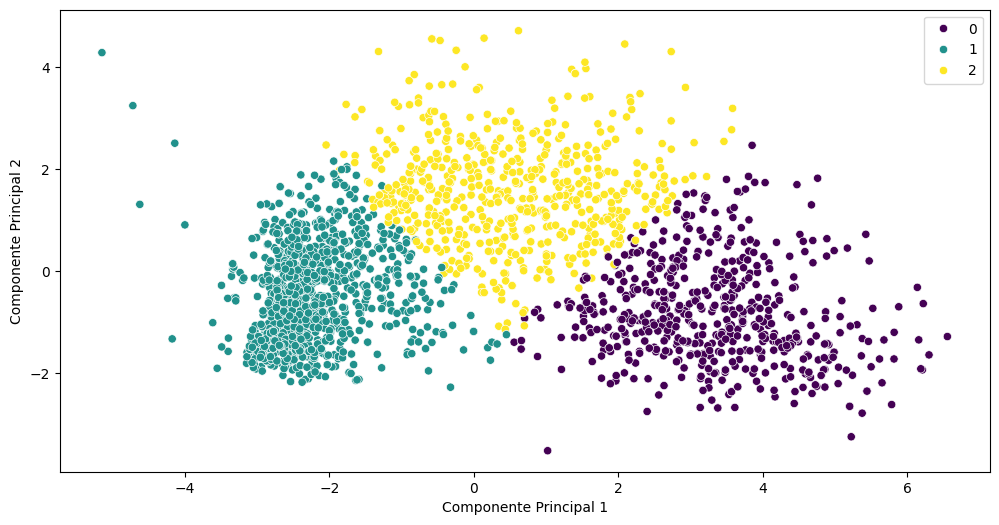

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Visualización comparativa (heatmap)

Para ver las diferencias de consumo e ingreso entre clusters.

1. Normalizar las medias de cada variable
(“ingreso” puede estar en miles y “hijos en casa” en unidades, y necesitamos compararlas en la misma escala)

2. Dibuja un heatmap, donde:

* Filas = variables (ingreso, hijos, gastos, etc.).
* Columnas = clusters.
* Colores = intensidad relativa del valor (más alto = rojo, más bajo = morado).



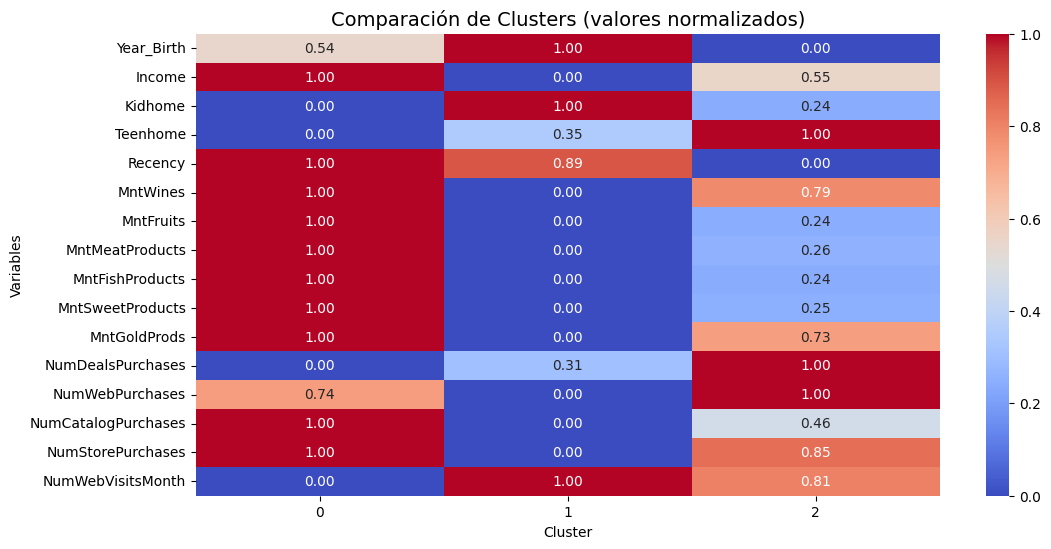

In [ ]:

# Normalizamos el resumen para que las escalas sean comparables
cluster_norm = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

plt.figure(figsize=(12,6))
sns.heatmap(cluster_norm.T, cmap="coolwarm", annot=True, fmt=".2f")

plt.title("Comparación de Clusters (valores normalizados)", fontsize=14)
plt.ylabel("Variables")
plt.xlabel("Cluster")
plt.show()


<h1

Cluster 0 (rojo intenso en casi todas las variables)

* Altos ingresos.
* Alto gasto en vinos, carnes, dulces, oro, etc.
* Compras frecuentes en web y catálogo.
* Menos hijos en casa.

👉 Perfil: Clientes de alto poder adquisitivo, fuertes consumidores.

<h1

Cluster 1 (azul en casi todo)

* Ingresos bajos.
* Gasto reducido en todos los productos.
* Más hijos y adolescentes en casa.
Visitan mucho la web, pero compran poco.

👉 Perfil: Familias de bajo consumo.



Con 2 clusters el modelo básicamente te dividiría en:

1. “Altos ingresos y alto consumo”

2. “Bajos ingresos y bajo consumo”

Es más simple y puede ser útil si se busca segmentación binaria clara: clientes premium vs no-premium.

Comparado con 3 clusters el modelo distinguía un segmento intermedio (ingresos medios, familias con adolescentes). Mientras que con 2 grupos, se pierde ese matiz, aunque la separación sea más clara.

In [ ]:

labels = kmeans.fit_predict(X_scaled)

# Añadimos los clusters al dataframe original
df_clusters = df_def.copy()
df_clusters["Cluster"] = labels

# Estadísticas generales por cluster
perfil_clusters = df_clusters.groupby("Cluster").agg({
    "Year_Birth": ["mean", "min", "max"],
    "Income": "mean",
    "Kidhome": "mean",
    "Teenhome": "mean",
    "MntWines": "mean",
    "MntMeatProducts": "mean",
    "MntFishProducts": "mean",
    "MntSweetProducts": "mean",
    "MntGoldProds": "mean",
    "NumWebVisitsMonth": "mean",
    "Recency": "mean",
    "Response": "mean"
})

# Redondeamos para mejor lectura
perfil_clusters = perfil_clusters.round(2)

print(perfil_clusters)


        Year_Birth                Income Kidhome Teenhome MntWines  \
              mean   min   max      mean    mean     mean     mean   
Cluster                                                              
0          1968.39  1899  1995  76708.23    0.04     0.17   585.84   
1          1971.75  1893  1996  34685.33    0.81     0.44    40.67   
2          1964.37  1943  1992  57984.91    0.23     0.94   470.45   

        MntMeatProducts MntFishProducts MntSweetProducts MntGoldProds  \
                   mean            mean             mean         mean   
Cluster                                                                 
0                452.46           99.70            71.46        76.94   
1                 22.93            6.91             4.94        15.07   
2                134.32           29.19            21.55        60.54   

        NumWebVisitsMonth Recency Response  
                     mean    mean     mean  
Cluster                                     
0    

# Conclusión

Cluster 0: clientes premium, **alto valor**.

Cluster 1: clientes de bajo ingreso, **menor valor**.

Cluster 2: clientes intermedios, **valor medio**.

Esto ya da una base para segmentación de marketing, por ejemplo, promociones exclusivas para cluster 0, campañas de fidelización para cluster 2 o estrategias digitales más agresivas para cluster 1.